In [1]:
from numpy import sin, cos, pi, exp, e
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from IPython.display import Audio

# Configure default pyplot settings
plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

# Enable importing from modules in top-level directory
from sys import path
if path[0] != '..': path.insert(0, '..')

<img src="figures/NTNU_logo_vertical.svg" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Working with the Fourier Series

* **Course AIS2201 - Signal Processing**
* **Week 35, 2025**
* **Lecturer: Kai Erik Hoff**



# Topics
<div style="width: 100%;">
    <img src="figures/Fig0_EKG.png" style="float: right; width: 35%" />
    <div style="width: 55%">
    <br>
    <ul>
      <li>Sinusoids recap</li>
      <li>Intro to spectral representation</li>
      <li>Linear and Logarithmic Scale</li>
      <li>Interpreting the Fourier Series</li>
      <li>Signal operations in the frequency domain</li>
      <li>Noise in the frequency domain</li>
      <li>Spectrograms</li>
<!--      <li>Periodiske signal</li>
      <li>Fourierrekke intro</li>
      <li>Frekvensmiksing og modulasjon</li>
      <li>Frekvensforskyvning og fourieranalyse</li>
      <li>Fourierintegralet forklart</li>-->
    </ul>  
    </div>
</div> 

# Sinusoids recap

## Recap: Sinusoids $\leftrightarrow$ quadrature signals

<img src="figures/Fig5-4_Euler3D.png" style="width: 65%; margin-left: 100px" />

1. Med reelle signal menes at de ikke har noen imaginær komponent. 
2. Legg merke til at magnituden til hver frekvenskomponent er $\frac{1}{2}$

## Periodic signals and fundamental frequencies
<br>
<div style="width: 100%;">
    <img src="figures/Fig1_Harmonics.png" style="float: right; width: 35%" />
    <div style="width: 55%">
    <br>
    <ul>
      <li>A signal $x(t)$ is perodic if there exists a time interval $T$ where $x(t-T_0) = x(t)$.</li>
        <ul><li>The <i>shortest</i> time interval $T$ which satisfies this requirement is the <i>fundamental frequency</i> $T_0$ </li>
      <li>Periodic signals can be described as a sum of sinusoids</li>
      <ul><li>Each frequency component has a frequency which is an integer multiple of the fundamental frequency $f_0 = \frac{1}{T_0}$.</li>
          <li>The $k$'th harmonic component has frequency $f_k = \frac{k}{T_0}$.</li></ul>
    </ul>  
    </div>
</div> 

## Periodic signal example: *musical notes*
* Analysis of the frequency content of a musical note will show a majority presence of harmonic components.
    * Frequency spectrum has "peaks" at regular intervals $f_k = \frac{k}{T_0}$.
 
<img src="figures/Fig2_PianoSpectrum.png" style="width: 90%" />
<!--* Analyse av frekvensinnholdet til en musikalsk tone viser tydelig at signalet i hovedsak består av et periodisk signal.
    * Det oppstår regelmessige "topper" i frekvensspekteret for alle frekvensene $f_k = \frac{k}{T_0}$.
-->
    


# How to find the fundamental frequency

### Time domain
* Look for repeating patterns in the domain

### Frequency domain
* For a signal $x(t)$ with frequency components $f \in \{f_a, f_b, f_c, \ldots \}$, the fundamental frequency $f_0$ will be the ***highest common denominator*** for all frequency components present.

# Fundamental frequency $f_0$ and the Fourier Series
* **Purpose:** Describe any periodic signal $x(t)$ as a sum of quadrature signals $\boldsymbol{a}_k\cdot e^{j\omega_k t}$.
* Since $x(t)$ repeats after the period $T_0=\frac{1}{f_0}$, the problem reduces to decomposing a single period of $x(t)$ into quadrature signals $\boldsymbol{a}_k\cdot e^{j \frac{2\pi k}{T_0} t}$ which ***must*** be periodic over the fundamental period $T_0$ themselves.
* Accomplished by systematically shifting every possible frequency component down to a constant term, and extracting it from the rest of the waveform.
* [Figure]

# Fourier series visualized


$$ \Large \boldsymbol{a}_k = \frac{1}{T_0} \cdot \int_{0}^{T_0}e^{-j\frac{2\pi \cdot k}{T_0}t}\cdot  x(t) \ dt$$

In [3]:
from ipywidgets import interact, IntSlider
fs = 100
seconds = 100
t = np.linspace(0, seconds, seconds*fs)
x_t = sig.sawtooth(2*pi*t)
@interact(k = IntSlider(min=-10, max=10, step=1, value=0))
def frequency_shift(k):
    x_shifted = x_t*e**(-2j*pi*t*k)
    plt.magnitude_spectrum(x_t*e**(-2j*pi*t*k), Fs=fs, sides='twosided')
    plt.axvline(0, 0, 1,color='r', linestyle=":")
    plt.xlim([-10, 10])
    plt.title(f"a_{k} = {np.mean(x_shifted):.3f}")

interactive(children=(IntSlider(value=0, description='k', max=10, min=-10), Output()), _dom_classes=('widget-i…

# Mathematics of the Fourier Series summarized

* From time domain to fourier series.

$$ \boldsymbol{a}_k = \frac{1}{T_0} \cdot \int_{0}^{T_0}e^{-j\frac{2\pi \cdot k}{T_0}t}\cdot  x(t) \ dt$$

* From fourier series to time domain
$$x(t) = \sum_{k=-\infty}^{\infty} a_k \cdot e^{-j\frac{2\pi \cdot k}{T_0}t}$$
    * Equivalent to:
    $$x(t) = A_0 + 2\cdot \sum_{k=1}^{\infty} A_k \cos\left(2\pi \cdot \frac{k\cdot t}{T_0} + \phi_k \right), \ \ \ a_k = A_k\cdot e^{j\phi_k}$$

* Recommended videos on the topic:
    * [Fourier Visualized](https://www.youtube.com/watch?v=spUNpyF58BY)

# Frequency-domain properties



### Important mathematical notations
* $x(t)$:  amplitude value of signal over time.


* $X(f)$ or $X(\omega)$: Properties of the signal's frequency components with frequency $f$ cycles per second or $\omega$ radians per second. Complex function:
    * $|X(f)$| / $|X(\omega)|$: Magnitude spectrum
    * $\angle(X(f))$ / $\angle(X(\omega))$: Phase spectrum
    
<!--
* $X(f)$ or $X(\omega)$: Egenskapene til signalets frekvenskomponent med frekvens lik $f$ svingninger i sekundet eller $\omega$ rad/s. <br> Deles opp som følger:
    * $|X(f)$| / $|X(\omega)|$: Frekvenskomponentens styrkegrad
    * $\angle(X(f))$ / $\angle(X(\omega))$: Frekvenskomponentens faseledd
-->

### Two-sided spectrums
* Signals have both positive *and* negative frequency components
* Real-valued signals are *always* complex conjugately symmetric:

$$\begin{align}
X(-f) &= X^{*}(f) \\
|X(-f)| &= |X(f)| \\
\angle X(-f) &= - \angle X(f)
\end{align}$$

* *Why* are real-valued signals always complex-conjugate symmetric? Because the sum of to complex conjugate numbers $z$ and $z^*$ is always $2\cdot \mathcal{R}e(z)$:
$$z + z^* = x + jy + x - jy = 2 \cdot x$$







## Two-sided frequency spectrum of sinusoid
<div style="width: 100%;">
    <img src="figures/Fig5-5_CosineFreq.png" style="float: right; width: 40%" />
    <div style="width: 50%">
    <br>
        <br>

</div> 

$$\begin{align}
x(t) &= \cos\left(2\pi \cdot 80 \cdot t - \frac{5\pi}{6}\right) \\
&= \frac{1}{2}\cdot \left( e^{j \frac{5\pi}{6}}\cdot e^{-j160\pi t} + e^{-j \frac{5\pi}{6}}\cdot e^{j160\pi t} \right)
\end{align}$$

* Twosided frequency spectrums show a "complete" mathematical representation of a signal's frequency content described by quadrature signals.

# Interpreting the fourier series

* A "list" of complex values, where each element determines the $\text{Magnitude}$ and $\text{Phase}$ of all quadrature components $A_k\cdot e^{j(\omega_k \cdot t+ \phi_k)}$ which combine to create a given.
<!--* En "liste" med komplekse verdier, der hvert element forteller $Amplituden$ og $Fasen$ til alle *komplekse eksponential-funksjoner* $A_k\cdot e^{j(\omega_k \cdot t+ \phi_k)}$ som til sammen utgjør et sammensatt signal.
-->
* The frequency  $F_k$ of each component is determined by the position $k$ in the series, and is a measure of *how many cycles* the component will complete during the analysis interval $T_0$ (the fundamental period).

$$f_k =\frac{k}{T_0}$$

* A fourier series can be described as a *discrete* representation of a signal $x(t)$ in the frequency domain.
* Example:

|$k:$|$-4$|$-3$|$-2$|$-1$|$0$|$1$|$2$|$3$|$4$|
|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|
|$c_k:$| $\frac{j}{4\pi}$|$\frac{j}{3\pi}$|$\frac{j}{2\pi}$|$\frac{j}{\pi}$|$0$|$\frac{-j}{\pi}$|$\frac{-j}{2\pi}$|$\frac{-j}{3\pi}$|$\frac{-j}{4\pi}$|
* We can visualize the fouriers series as a spectral plot: 
    * given $f_0 = 20Hz$...

Text(0, 0.5, 'Phase (rad)')

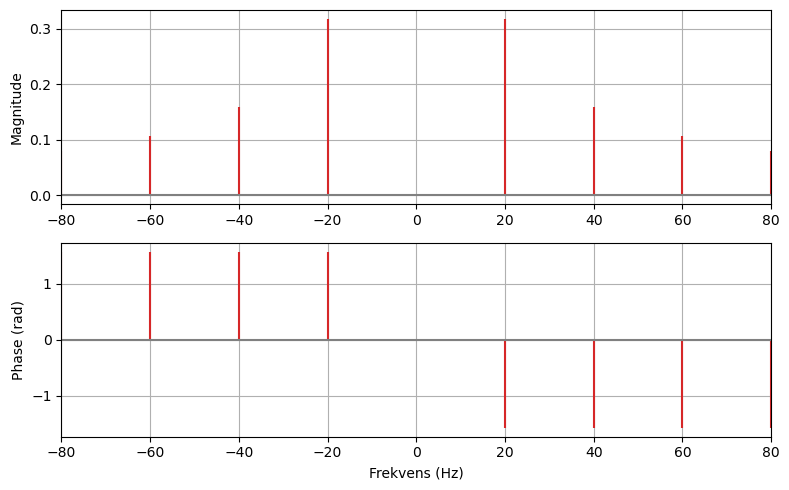

In [4]:
f_0 = 20 # Hz
T_0 = 1/f_0
%matplotlib inline

k = np.arange(-4, 5)
c_k = np.array([1j/4, 1j/3, 1j/2, 1j, 0, -1j, -1j/2, -1j/3, -1j/4])/pi

f_k = k*f_0

plt.close(2); plt.figure(2, figsize=(8,5))
plt.subplot(2,1,1)
plt.stem(f_k, np.abs(c_k),linefmt='tab:red', markerfmt='', basefmt='grey')
plt.grid(True)
plt.ylabel("Magnitude")
plt.subplot(2,1,2)
plt.stem(f_k, np.angle(c_k),linefmt='tab:red', markerfmt='', basefmt='grey')
plt.grid(True)
plt.xlabel("Frekvens (Hz)")
plt.ylabel("Phase (rad)")

## Coding example: finding fourier series coefficients
* Use a computational approach to calculating the fourer series of a square wave for  $-10\leq k \leq 10$. 

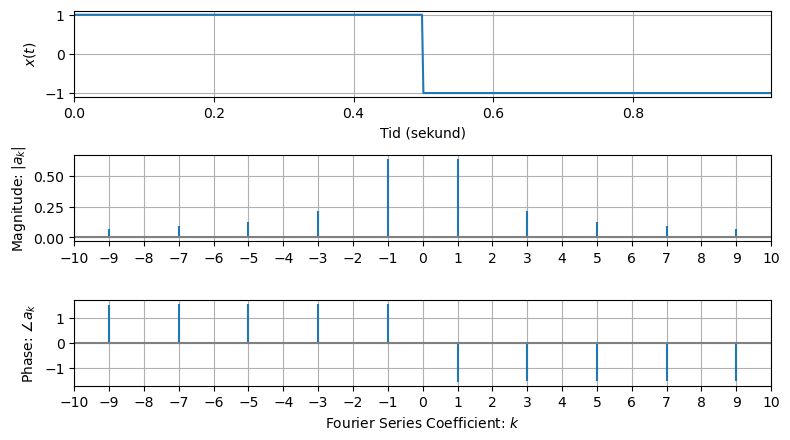

In [28]:
from numpy import e, pi

def fourier_series(t, x_t, k_max=10):
    k_series = np.arange(-k_max, k_max+1)
    a_k = np.zeros(2*k_max+1) + 0j
    
    for i, k in enumerate(k_series):
        a_k[i] = np.mean(x_t*e**(-2j*pi*k*t/T_0))
    return k_series, a_k


# Her lager vi 1 periode av trekantpulsen x(t):
fs = 500; T_0 = 1 # 1 sekund
t = np.linspace(0, T_0, int(T_0*fs), endpoint=False)
x_t = np.concatenate((np.ones(T_0*fs//2), -np.ones(T_0*fs//2)))

# Utfør fourierrekkedekomposisjon

k, c_k = fourier_series(t, x_t, 10)

plt.close(1); plt.figure(1)
plt.subplot(3,1,1)
plt.plot(t, x_t)
plt.xlabel("Tid (sekund)")
plt.ylabel(r"$x(t)$")
plt.grid(True)
plt.subplot(3,1,2)
plt.stem(k, np.abs(c_k),basefmt="grey").markerline.set_markersize(0)
plt.xticks(k)
plt.ylabel(r'Magnitude: $|a_k|$')
plt.grid(True)
plt.xlim([-10, 10])
plt.subplot(3,1,3)
plt.stem(k, np.where(np.abs(c_k)>1e-6, np.angle(c_k), 0),basefmt="grey").markerline.set_markersize(0)
plt.xticks(k)
plt.xlabel(r'Fourier Series Coefficient: $k$')
plt.ylabel(r'Phase: $\angle a_k$')
plt.grid(True)
plt.xlim([-10, 10])
plt.tight_layout()# Rydd plass til aksenavn mellom plot

## Coding example 2: generating a waveform from coefficients
* Reconstruct  $x(t)$ based on the coefficients $a_k$. 

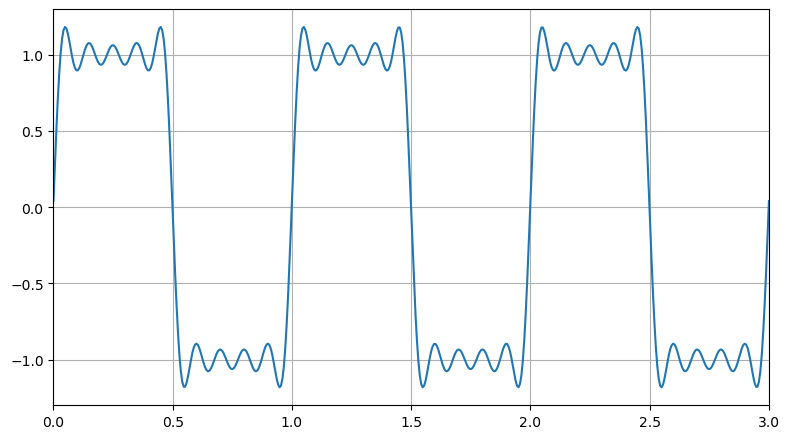

In [31]:
def inverse_fourier_series(k, a_k, t, T_0=1):
    x = np.zeros(len(t)) + 0j
    for i, k in enumerate(k):
        x += a_k[i]*e**(2j*pi*t*k/T_0)
    
    assert np.isclose(np.sum(np.abs(np.imag(x))), 0)
    
    x = np.real(x)
    return x


t = np.linspace(0, 3, 501)
x_reconstructed = inverse_fourier_series(k, c_k, t)
plt.plot(t, x_reconstructed)

# Signal operations - *scaling*


<img src="figures/Fig15_Scaling.png" style="width: 80%; margin-left: 100px" />

* $y(t) = \gamma \cdot x(t)$
    * $\gamma$ is some constant
* Same operation in frequency domain:<br><br>
$$\hat{a}_k = \gamma \cdot a_k$$<br>
where $\hat{a_k}$ is the "scaled" frequency component

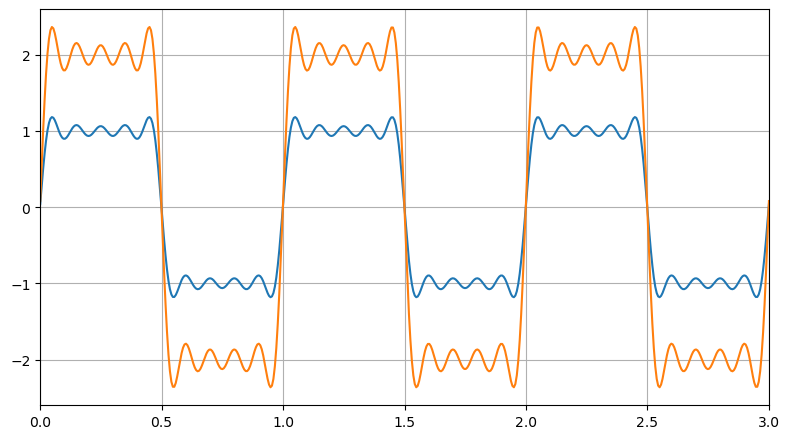

In [32]:
c_scaled = c_k*2
t = np.linspace(0, 3, 501)
x_scaled = inverse_fourier_series(k, c_scaled, t)
plt.plot(t, x_reconstructed)
plt.plot(t, x_scaled)

# Signal operations - adding a constant term


<img src="figures/Fig16_Add_Offset.png" style="width: 80%; margin-left: 100px" />

* In the time domain
$$x(t) + \alpha$$

* Make corresponding adjustments to the $f = 0$Hz component ($a_0$) <br>
$$\hat{a}_0 = c_0 + \alpha$$<br>
$\hat{a_k}$ is the new fourier series coefficient after shifting

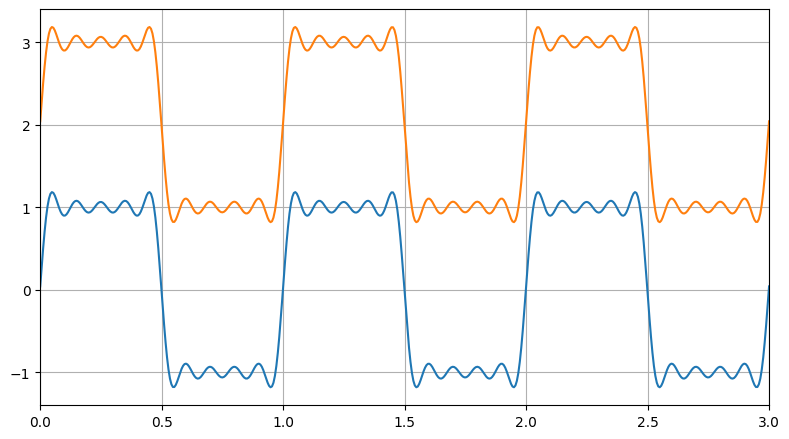

In [6]:
c_shifted = c_k + np.where(k==0, 2, 0)
t = np.linspace(0, 3, 501)
x_shifted = inverse_fourier_series(k, c_shifted, t)
plt.plot(t, x_reconstructed)
plt.plot(t, x_shifted)

# Signal operations - *horizontal shift / time shift*


* Tidsforskyvning av et signal $x(t)$ beskrevet i tid tilsvaer å substutuere $t$ med $t-\tau_d$ i funksjonsuttrykket, der $\tau_d$ er forsinkelse påført signalet. 
$$y(t) = x(t-\tau_d)$$


* For sinusbølger: 
$$ \cos\left( \omega \cdot (t-\tau_d)\right) = \cos\left(\omega\cdot t-\omega \cdot \tau_d \right)$$
    - Vi påfører altså en *faseforskyvning* med $\Delta \phi = \omega\cdot \tau_d$.
    
    
* Når et signal er beskrevet av fourierrekke-koeffisientene 
$$\hat{c_k} = c_k \cdot e^{-j \frac{2\pi k}{T_0}\cdot \tau_d}, \ \ \ \frac{2\pi k}{T_0}=\omega\$$

    - $\hat{c}_k$ er symbolet for de "nye" fourierrekke-koeffisientene etter tidsforskyving

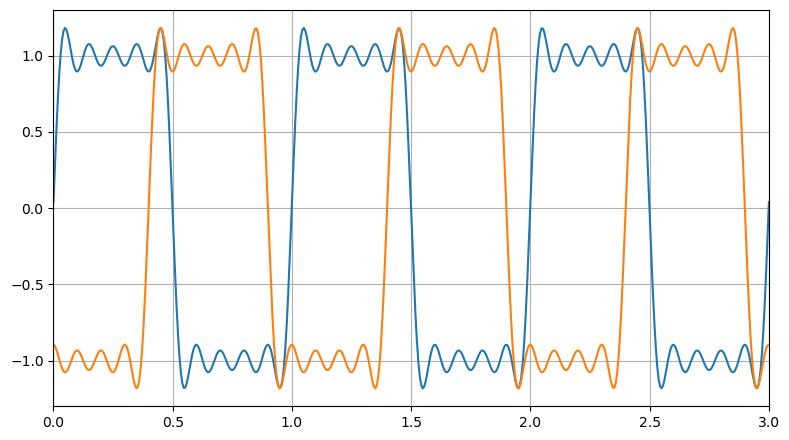

In [34]:
delay = 0.4 # seconds
c_delayed = c_k*e**(-2j*pi*k/T_0*delay)
t = np.linspace(0, 3, 501)
x_delayed = inverse_fourier_series(k, c_delayed, t)
plt.plot(t, x_reconstructed)
plt.plot(t, x_delayed)

# Signal operations - differentiation


* Derivasjon av eksponentialer:

$$\frac{d e^{\alpha \cdot t}}{dt} = \alpha e^{\alpha \cdot t}$$

* Det følger dermed at 
$$\frac{d Ae^{j\omega_k \cdot t}}{d t} = j A \omega_k \cdot e^{j\omega_k \cdot t}$$
der $\omega_k = \frac{2\pi k}{T_0}$ for alle heltall $k$.


* Multiplikasjon av hver av de komplekse fourierrekke-koeffisientene $c_k = A_k \cdot e^{j\phi_k}$ med $j\omega_k$ vil tilsvare derivasjon i tidsdomenet.

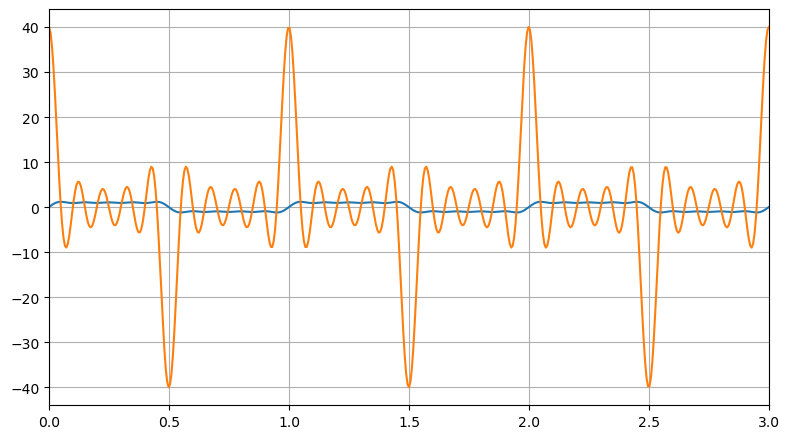

In [35]:
w_k = 2*pi*k/T_0
c_diff = c_k*w_k*1j
t = np.linspace(0, 3, 501)
x_diff = inverse_fourier_series(k, c_diff, t)
plt.plot(t, x_reconstructed)
plt.plot(t, x_diff)

# Signal operations - integration

* Integration of exponential terms:

$$\int_0^t e^{\alpha \cdot \tau}d \tau = \frac{1}{\alpha} e^{\alpha \cdot t} + C$$

* Therefore:
$$\int_0^t Ae^{j\omega_k \cdot \tau} d\tau = \frac{1}{j\omega_k} \cdot Ae^{j\omega_k \cdot t}$$
where $\omega_k = \frac{2\pi k}{T_0}$ for all $k \in \mathbb{Z}$, and assuming $C=0$.


* Multiplying all fourier coefficients $a_k = A_k \cdot e^{j\phi_k}$ by $\frac{1}{j\omega_k}$ will constitute integration in the time domain.

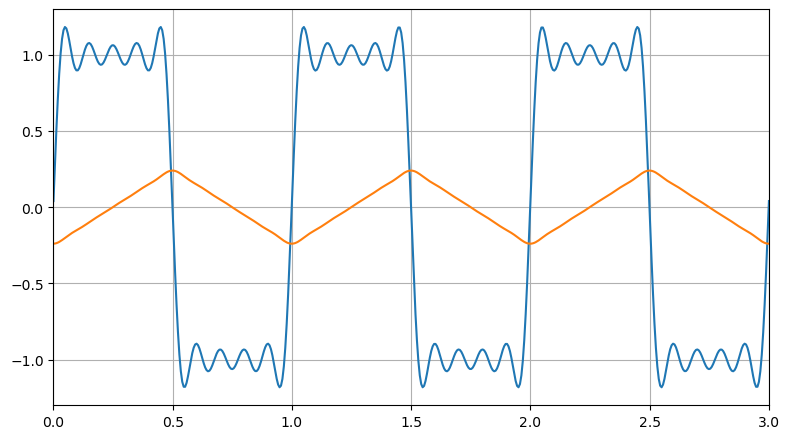

In [36]:
jw = np.where(k != 0, (2j*pi*k/T_0), 1) # Ignore constant term to avoid divide by zero error!
c_int = c_k/jw
t = np.linspace(0, 3, 501)
x_int = inverse_fourier_series(k, c_int, t)
plt.plot(t, x_reconstructed)
plt.plot(t, x_int)

# On non-repeating signals

* Non-repeating $\rightarrow$ infinitely long period for fourier decomposition.
$$c_k = \lim_{T_0 \rightarrow \infty} \left(\frac{1}{T_0}\cdot  \int_0^{T_0}x(t)\cdot e^{-j\frac{2\pi k}{T_0}\cdot t}dt\right)$$
    - Infinitely small space between frequency components.

* The result is a *continuous* frequency spectrum $X(f)$.

# The general fourier transform

\begin{align}
X(f) &= \mathscr{F}\left(x(t)\right)\\
&= \int_{-\infty}^{\infty}x(t)\cdot e^{-j2\pi f t} dt
\end{align}

* Mathematical transformation of a function $x(t)$ to the frequency domain.
* Applications mainly theoretical, giving a way to describe *specific* functions for $x(t)$ in the frequency domain.
    - Example: analysis of LTI systems such as mass-spring-damper or RLC circuits.